## **Controllable Generation using GANs with CelebA Dataset**

**Importing Libraries**

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython import display
from tqdm import tqdm
from google.colab import drive
import urllib
import zipfile
import glob
import pandas as pd
from PIL import Image
import imageio.v2 as imageio
import os

**Load Data**

In [2]:
data_url="https://storage.googleapis.com/learning-datasets/Resources/archive.zip"
data_file_name="archive.zip"
download_dir="/content/celeb/"
urllib.request.urlretrieve(data_url, data_file_name)

zip_ref = zipfile.ZipFile(data_file_name, "r")
zip_ref.extractall(download_dir)
zip_ref.close()

In [3]:
image_paths=np.array(sorted(glob.glob("/content/celeb/img_align_celeba/img_align_celeba/*.jpg")))
image_paths.shape

(202599,)

In [4]:
image_paths[[0, 1, 2, -3, -2, -1]]

array(['/content/celeb/img_align_celeba/img_align_celeba/000001.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/000002.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/000003.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/202597.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/202598.jpg',
       '/content/celeb/img_align_celeba/img_align_celeba/202599.jpg'],
      dtype='<U59')

In [5]:
df_labels=pd.read_csv("/content/celeb/list_attr_celeba.csv")
df_labels[df_labels.columns[1:]]=df_labels[df_labels.columns[1:]].replace(-1, 0)
df_labels=df_labels.sort_values(by="image_id")
df_labels

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                 0                1           1   
1       000002.jpg                 0                0           0   
2       000003.jpg                 0                0           0   
3       000004.jpg                 0                0           1   
4       000005.jpg                 0                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                 0                0           1   
202595  202596.jpg                 0                0           0   
202596  202597.jpg                 0                0           0   
202597  202598.jpg                 0                1           1   
202598  202599.jpg                 0                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                     0     0      0         0         0           0  ...   
1                     1     0      0         0         1           0  ...   
2                     0     0      0         1         0           0  ...   
3                     0     0      0         0         0           0  ...   
4                     0     0      0         1         0           0  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594                0     0      0         1         0           0  ...   
202595                0     0      1         1         0           0  ...   
202596                0     0      0         0         0           1  ...   
202597                0     0      0         1         0           1  ...   
202598                0     0      0         0         0           0  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0               0        1              1          0                 1   
1               0        1              0          0                 0   
2               0        0              0          1                 0   
3               0        0              1          0                 1   
4               0        0              0          0                 0   
...           ...      ...            ...        ...               ...   
202594          0        0              0          0                 0   
202595          0        1              1          0                 0   
202596          0        1              0          0                 0   
202597          0        1              0          1                 1   
202598          0        0              0          1                 0   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0                 0                 1                 0                0   
1                 0                 0                 0                0   
2                 0                 0                 0                0   
3                 0                 1                 1                0   
4                 0                 1                 0                0   
...             ...               ...               ...              ...   
202594            0                 1                 0                0   
202595            0                 0                 0                0   
202596            0                 0                 0                0   
202597            0                 1                 0                0   
202598            0                 1                 0                0   

        Young  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[202599 rows x 41 columns]

In [6]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [7]:
label_names=df_labels.columns[1:].tolist()
num_classes=len(label_names)
print(num_classes)
label_names

40


['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [8]:
data_labels=df_labels.iloc[:, 1:].values
data_labels.shape

(202599, 40)

In [5]:
batch_size=128
buffer_size=1024
epochs=10
resize=(64, 64)
z_dim=64
AUTOTUNE=tf.data.AUTOTUNE

In [10]:
def data_processing(path, label, resize=resize):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.central_crop(img, central_fraction=0.8)
  img = tf.image.resize(img, resize, method="bicubic", antialias=True)
  img = tf.cast(img, tf.float32)/127.5 -1

  label=tf.cast(label, tf.float32)

  return img, label

In [11]:
train_dataset=tf.data.Dataset.from_tensor_slices((image_paths, data_labels))
train_dataset = (train_dataset
                 .map(lambda x, y: data_processing(x, y, resize), num_parallel_calls=AUTOTUNE)
                 .shuffle(buffer_size, seed=123)
                 .batch(batch_size)
                 .prefetch(AUTOTUNE))

In [12]:
for images, labels in train_dataset.take(1):
  print(images.shape, labels.shape)

(128, 64, 64, 3) (128, 40)


In [13]:
labels[0]

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)>

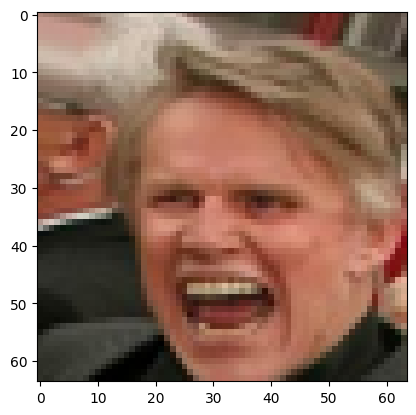

In [14]:
plt.imshow(tf.cast((images[0]+1) * 127.5, tf.uint8));

### **Train the Classifier**

In [ ]:
tf.keras.backend.clear_session()

In [15]:
def model_classifier(num_classes=num_classes, use_bias=True, name="classifier"):
  initializer = tf.keras.initializers.RandomNormal(0., 0.02, seed=123)

  input=tf.keras.Input(shape=(64, 64, 3))
  x=tf.keras.layers.Conv2D(64, (4,4), strides=2, padding="same", kernel_initializer=initializer, use_bias=use_bias)(input)
  x=tf.keras.layers.LeakyReLU(0.2)(x)

  x=tf.keras.layers.Conv2D(128, (4,4), strides=2, padding="same", kernel_initializer=initializer, use_bias=use_bias)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.LeakyReLU(0.2)(x)

  x=tf.keras.layers.Conv2D(256, (4,4), strides=2, padding="same", kernel_initializer=initializer, use_bias=use_bias)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.LeakyReLU(0.2)(x)

  x=tf.keras.layers.Conv2D(512, (4,4), strides=2, padding="same", kernel_initializer=initializer, use_bias=use_bias)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.LeakyReLU(0.2)(x)

  x=tf.keras.layers.Conv2D(num_classes, (4,4), strides=1, kernel_initializer=initializer)(x)
  x=tf.keras.layers.Flatten()(x)

  model=tf.keras.Model(inputs=input, outputs=x, name=name)

  return model

In [ ]:
classifier=model_classifier()
classifier.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 batch_normalization (Batch  (None, 16, 16, 128)       512       
 Normalization)                                                  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                        

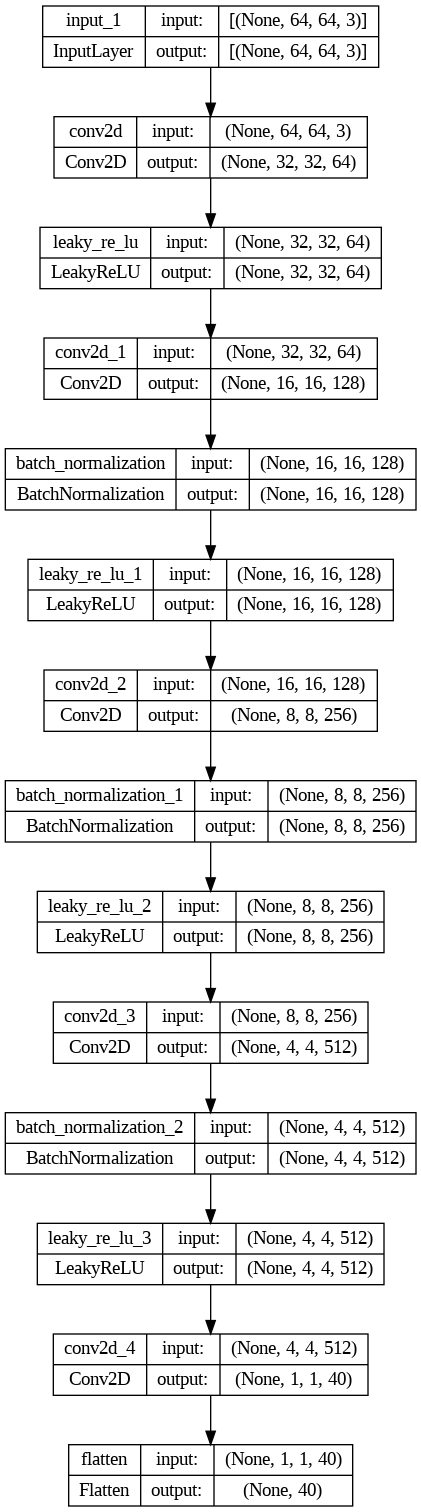

In [ ]:
tf.keras.utils.plot_model(classifier, show_shapes=True, show_layer_names=True)

In [ ]:
def accuracy(y_true, y_pred):
  y_pred=tf.math.sigmoid(y_pred)
  y_pred=tf.cast(y_pred>=0.5, dtype=tf.float32)
  accuracy=tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))
  return accuracy

In [ ]:
class_optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
class_loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)

classifier.compile(optimizer=class_optimizer, loss=class_loss, metrics=[accuracy])

In [ ]:
tf.random.set_seed(123)

history=classifier.fit(train_dataset, epochs=epochs, verbose=1)

Epoch 1/10
1583/1583 [==============================] - 189s 115ms/step - loss: 0.2561 - accuracy: 0.8878
Epoch 2/10
1583/1583 [==============================] - 180s 113ms/step - loss: 0.2224 - accuracy: 0.9019
Epoch 3/10
1583/1583 [==============================] - 189s 119ms/step - loss: 0.2094 - accuracy: 0.9077
Epoch 4/10
1583/1583 [==============================] - 215s 135ms/step - loss: 0.1997 - accuracy: 0.9123
Epoch 5/10
1583/1583 [==============================] - 207s 130ms/step - loss: 0.1911 - accuracy: 0.9163
Epoch 6/10
1583/1583 [==============================] - 180s 113ms/step - loss: 0.1828 - accuracy: 0.9202
Epoch 7/10
1583/1583 [==============================] - 180s 113ms/step - loss: 0.1747 - accuracy: 0.9241
Epoch 8/10
1583/1583 [==============================] - 177s 111ms/step - loss: 0.1667 - accuracy: 0.9281
Epoch 9/10
1583/1583 [==============================] - 180s 113ms/step - loss: 0.1586 - accuracy: 0.9320
Epoch 10/10
1583/1583 [=======================

In [ ]:
def plot_metrics(history, renderer=None, epochs = epochs + 1):
  loss=history.history["loss"]
  accuracy=history.history["accuracy"]
  list_epochs=np.arange(1, epochs+1)

  fig=go.Figure()
  fig.add_trace(go.Scatter(x=list_epochs, y=loss, name="Loss", line=dict(color="blue", width=2)))
  fig.add_trace(go.Scatter(x=list_epochs, y=accuracy, name="Accuracy", line=dict(color="#FF6600", width=2)))
  fig.update_xaxes(title_text="Epoch")
  fig.update_yaxes(title_text="Metric")
  fig.update_layout(title=f"<b>Evolution of Metric across Epochs</b>",
                    title_font=dict(size=20),
                    title_x=0.5,
                    height=500,
                    width=1200)

  fig.show(renderer)

In [ ]:
# Interactive graphic
plot_metrics(history)

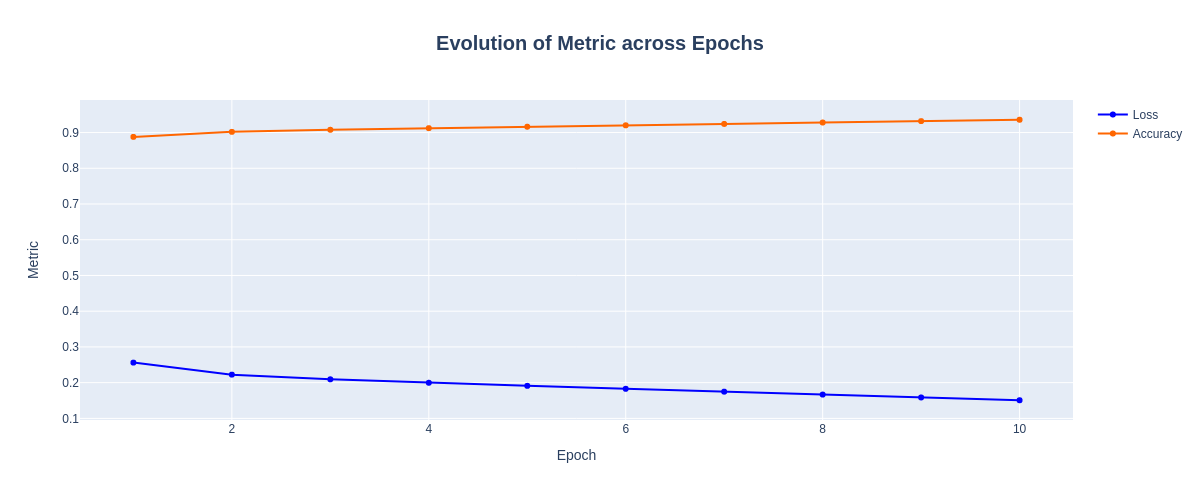

In [ ]:
# Image for GitHub
plot_metrics(history, renderer="png")

In [16]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# Save complete model

classifier.save("/content/drive/MyDrive/models/classifier_celeba.keras")

You could also save only the model weights:

``classifier.save_weights("/content/models/model_classifier.h5")``


### **Train the Generator**

In [17]:
# Image directory
directory_images = "/content/drive/MyDrive/images"
directory_celeba = os.path.join(directory_images, "celeba")

os.makedirs(directory_celeba, exist_ok=True)

In [4]:
# Display functions

def make_grid(images, num_examples, nrow):
  images=tf.unstack(images[:num_examples], axis=0)
  images=tf.concat(images, axis=1)
  images=tf.split(images, nrow, axis=1)
  images=tf.concat(images, axis=0)

  return images

def show_and_save_images(real_images, fake_images, epoch, num_examples=25, nrow=5):

  real_images=make_grid(real_images, num_examples, nrow)
  fake_images=make_grid(fake_images, num_examples, nrow)
  real_images = tf.cast((real_images+1) * 127.5, tf.uint8) # Denormalization
  fake_images = tf.cast((fake_images+1) * 127.5, tf.uint8)

  fig, ax = plt.subplots(1, 2, figsize=(nrow*2, nrow*2))
  ax[0].imshow(fake_images)
  ax[0].axis("off")
  ax[0].set_title("Generated Images")

  ax[1].imshow(real_images)
  ax[1].axis("off")
  ax[1].set_title("Real Images")

  plt.show()

  # Save fake images
  plt.imshow(fake_images)
  plt.axis("off")
  plt.savefig(os.path.join(directory_celeba, f"image{epoch:02d}.png"), transparent=True)
  plt.close()

In [19]:
tf.keras.backend.clear_session()

In [20]:
def model_generator(z_dim=z_dim):
  initializer = tf.keras.initializers.RandomNormal(0., 0.02, seed=123)

  input=tf.keras.Input(shape=(1, 1, z_dim))
  x=tf.keras.layers.Conv2DTranspose(512, (4,4), strides=1, padding="valid", kernel_initializer=initializer, use_bias=False)(input)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Dropout(0.5)(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Conv2DTranspose(256, (4,4), strides=2, padding="same", kernel_initializer=initializer, use_bias=False)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Dropout(0.5)(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Conv2DTranspose(128, (4,4), strides=2, padding="same", kernel_initializer=initializer, use_bias=False)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Conv2DTranspose(64, (4,4), strides=2, padding="same", kernel_initializer=initializer, use_bias=False)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Conv2DTranspose(3, (4,4), strides=2, padding="same", kernel_initializer=initializer, activation="tanh")(x)

  model=tf.keras.Model(inputs=input, outputs=x, name="generator")

  return model

In [21]:
generator=model_generator()
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1, 64)]        0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 4, 4, 512)         524288    
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 4, 4, 512)         2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 4, 4, 512)         0         
                                                                 
 re_lu (ReLU)                (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 8, 8, 256)         20

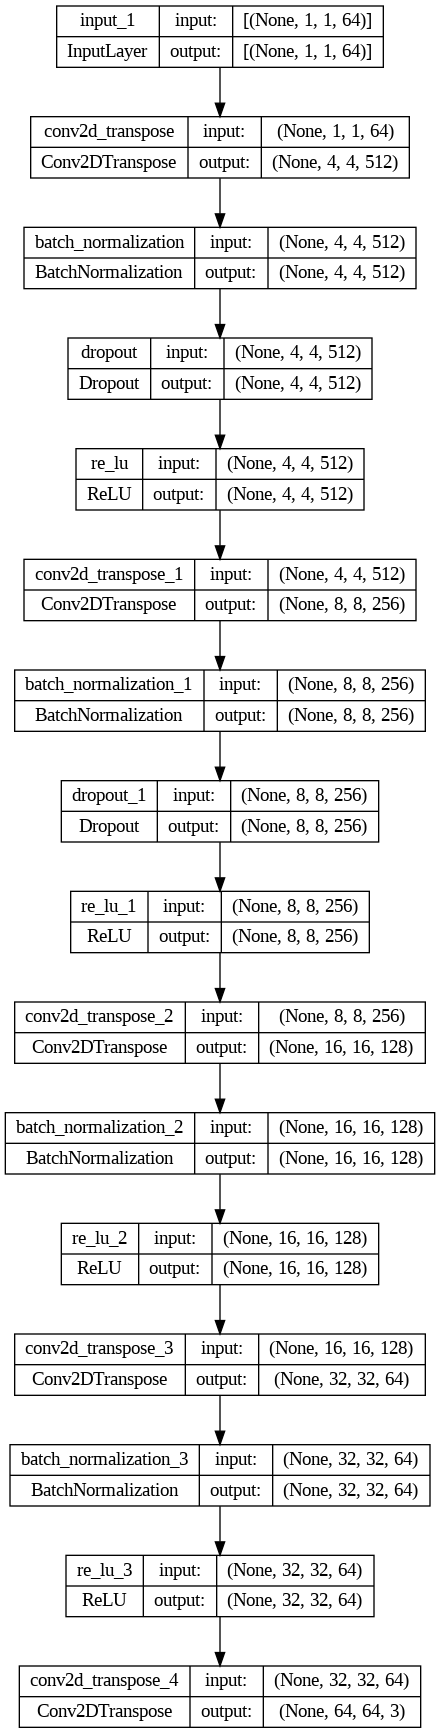

In [ ]:
tf.keras.utils.plot_model(generator, show_shapes=True, show_layer_names=True)

In [22]:
# The architecture is similar to that of the classifier

discriminator=model_classifier(num_classes=1, use_bias=False, name="discriminator")
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3072      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131072    
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 128)       512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                     

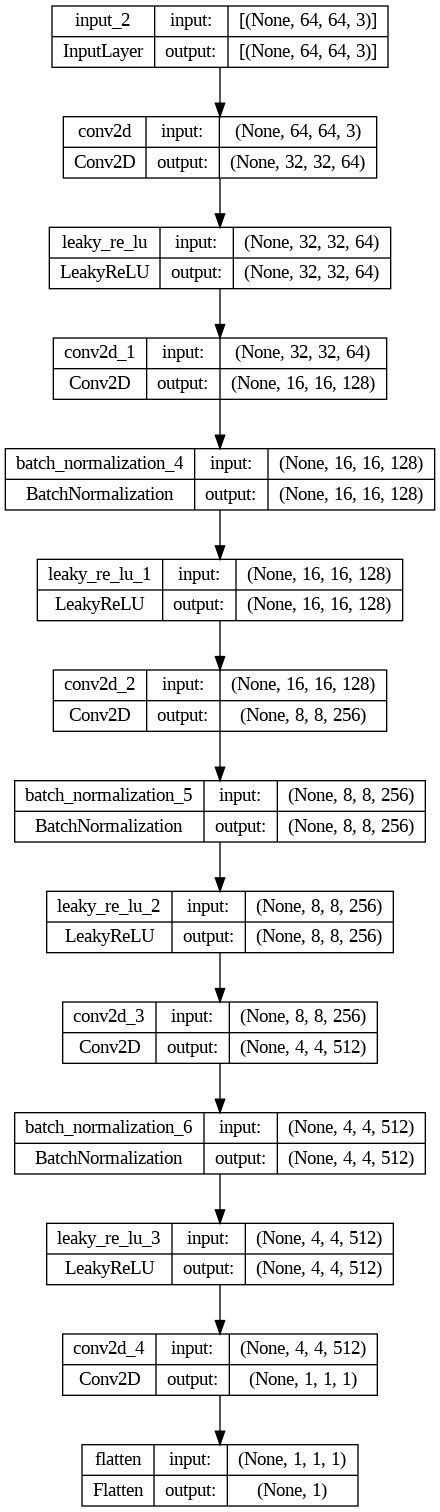

In [ ]:
tf.keras.utils.plot_model(discriminator, show_shapes=True, show_layer_names=True)

In [23]:
gen_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
loss_model = tf.keras.losses.BinaryCrossentropy(from_logits=True)

Because the training is lengthy, it's necessary to use checkpoints.

In [24]:
checkpoint_folder = "/content/drive/MyDrive/checkpoints/TensorFlow_GAN_CelebA/"
checkpoint_prefix = os.path.join(checkpoint_folder, "ckpt")

checkpoint = tf.train.Checkpoint(generator = generator,
                                 gen_optimizer = gen_optimizer,
                                 discriminator = discriminator,
                                 disc_optimizer = disc_optimizer)

pretrained = False #Change according to previous training

if pretrained:
  last_epoch = 10 #Put the last epoch of the pretrained model
  checkpoint.restore(tf.train.latest_checkpoint(checkpoint_folder))

  history = pd.read_csv(os.path.join(checkpoint_folder, f"losses_epoch_{last_epoch}.csv"))
  history = history.to_dict(orient="list")

else:
  last_epoch = 0
  os.makedirs(checkpoint_folder, exist_ok=True)
  history = {"gen_loss":[], "disc_loss":[]}

In [25]:
@tf.function
def train_step(real_images):
  cur_batch_size=len(real_images)
  noise=tf.random.normal(shape=(cur_batch_size, 1, 1, z_dim))

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    fake_images=generator(noise, training=True)

    real_out=discriminator(real_images, training=True)
    fake_out=discriminator(fake_images, training=True)

    # Generator Loss
    gen_loss=loss_model(tf.ones_like(fake_out), fake_out)

    # Discriminator Loss
    real_loss=loss_model(tf.ones_like(real_out), real_out)
    fake_loss=loss_model(tf.zeros_like(fake_out), fake_out)
    disc_loss = (fake_loss+real_loss) / 2

  gen_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
  disc_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  gen_optimizer.apply_gradients(zip(gen_gradients, generator.trainable_variables))
  disc_optimizer.apply_gradients(zip(disc_gradients, discriminator.trainable_variables))

  return gen_loss, disc_loss

Generate random images to create the GIF

In [36]:
tf.random.set_seed(123) #for reproducibility of the noise tensor
num_examples = 25
nrow = 5

noise = tf.random.normal((num_examples, 1, 1, z_dim))

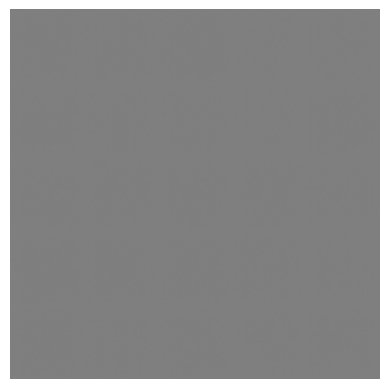

In [37]:
# Run the cell if the model is not pre-trained

if not pretrained:
  fake_images = generator(noise, training=False)
  fake_images = make_grid(fake_images, num_examples, nrow)
  fake_images = tf.cast((fake_images+1) * 127.5, tf.uint8) # Denormalization

  # Epoch 0 image
  plt.imshow(fake_images)
  plt.axis("off")
  plt.savefig(os.path.join(directory_celeba, f"image{0:02d}.png"), transparent=True);

In [38]:
epochs=10

In [39]:
def train_gan(epochs=epochs, num_examples=num_examples, nrow=nrow, save_model=True):
  history={"gen_loss":[], "disc_loss":[]}

  for epoch in range(epochs):
    gen_loss_list, disc_loss_list = [], []
    current_epoch = last_epoch + epoch +1

    with tqdm(train_dataset) as pbar:
      pbar.set_description(f"[Epoch: {epoch+1}/{epochs}]")
      for real_images, _ in pbar:
        gen_loss, disc_loss = train_step(real_images)

        gen_loss_list.append(gen_loss.numpy())
        disc_loss_list.append(disc_loss.numpy())

        pbar.set_postfix({"gen_loss": gen_loss.numpy(), "disc_loss": disc_loss.numpy()})

    gen_loss_mean = np.mean(gen_loss_list)
    disc_loss_mean = np.mean(disc_loss_list)
    history["gen_loss"].append(gen_loss_mean)
    history["disc_loss"].append(disc_loss_mean)

    display.clear_output(wait=False)
    print(f"Epoch {epoch+1}, GeneratorLoss: {gen_loss_mean}, DiscriminatorLoss: {disc_loss_mean}")
    fake_images=generator(noise, training=False)

    show_and_save_images(real_images, fake_images, current_epoch, num_examples, nrow)

    if save_model and (current_epoch % 5 == 0):
      checkpoint.save(file_prefix=checkpoint_prefix)

      df = pd.DataFrame(history)
      df.to_csv(os.path.join(checkpoint_folder, f"losses_epoch_{current_epoch}.csv"), index=False)


  return history

Epoch 10, GeneratorLoss: 3.2623918056488037, DiscriminatorLoss: 0.19647203385829926


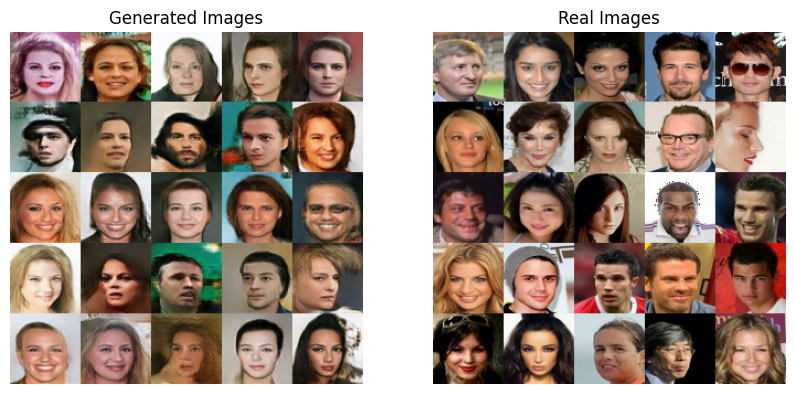

In [40]:
tf.random.set_seed(123)

history = train_gan()

In this case, 10 epochs are sufficient for the generator to efficiently generate faces, so it is not necessary to use checkpoints.

In [3]:
def plot_metrics(history, renderer=None, epochs = last_epoch + epochs + 1):
  gen_losses=history["gen_loss"]
  disc_losses=history["disc_loss"]
  list_epochs=np.arange(1, epochs+1)

  fig=go.Figure()
  fig.add_trace(go.Scatter(x=list_epochs, y=gen_losses, name="Generator Loss", line=dict(color="blue", width=2)))
  fig.add_trace(go.Scatter(x=list_epochs, y=disc_losses, name="Discriminator Loss", line=dict(color="#FF6600", width=2)))
  fig.update_xaxes(title_text="Epoch")
  fig.update_yaxes(title_text="Loss")
  fig.update_layout(title=f"<b>Evolution of Loss across Epochs</b>",
                    title_font=dict(size=20),
                    title_x=0.5,
                    height=500,
                    width=1200)

  fig.show(renderer)

In [42]:
# Interactive graphic
plot_metrics(history)

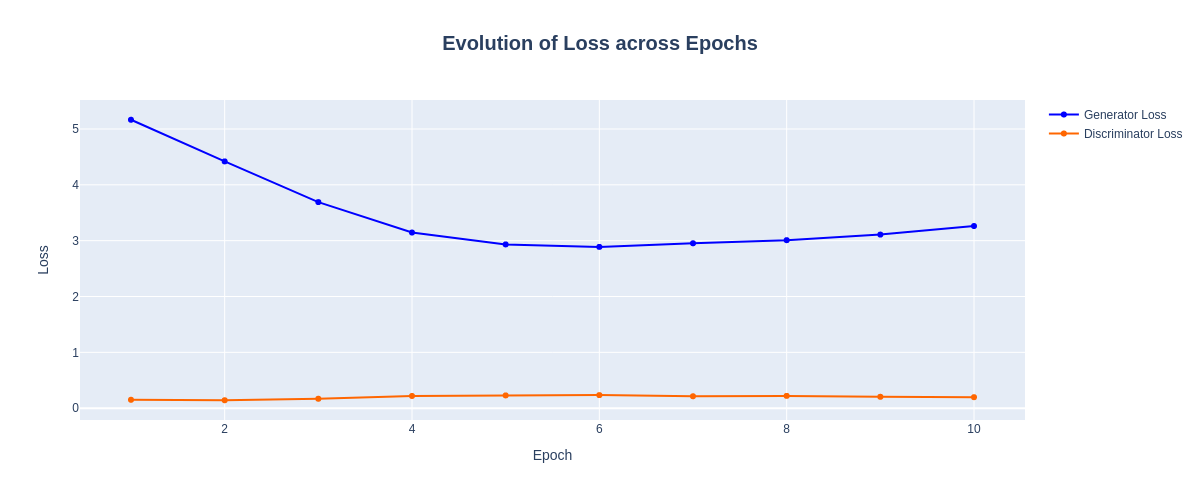

In [13]:
# Image for GitHub
plot_metrics(history, renderer="png")

In [46]:
# Save the generator

generator.save("/content/drive/MyDrive/models/generator_celeba.keras")

**Create a GIF from the generated images**

In [7]:
!pip install tensorflow_docs -q

import tensorflow_docs.vis.embed as embed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 3.4 MB/s eta 0:00:00


In [8]:
# Function to create gifs

def create_gif(gif_file, images_file, fps=1):
  with imageio.get_writer(gif_file, mode="I", loop=0, fps=fps) as writer:
    filenames = sorted(glob.glob(f"{images_file}/*.png"))
    for filename in filenames:
      image = imageio.imread(filename)
      writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


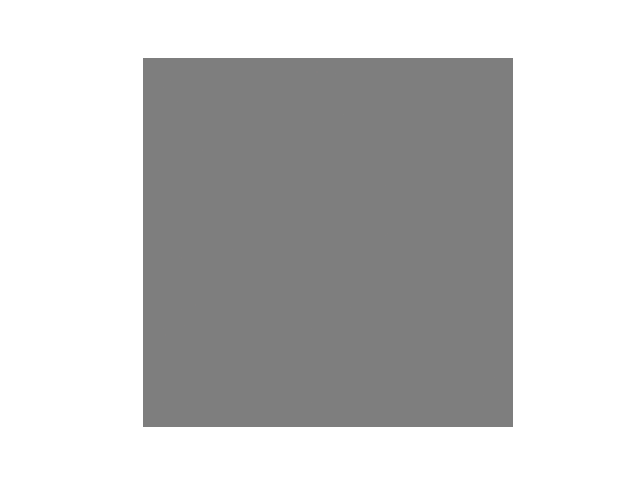

In [53]:
gif_file = os.path.join(directory_images, "celeba.gif")
create_gif(gif_file, directory_celeba, fps=1.5)
embed.embed_file(gif_file)

**Generated Examples**

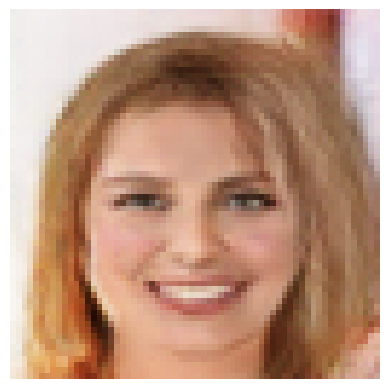

In [58]:
noise=tf.random.normal(shape=(1, 1, 1, z_dim))
fake_image=generator(noise)
plt.axis("off")
plt.imshow(tf.cast((fake_image[0]+1) * 127.5, tf.uint8));

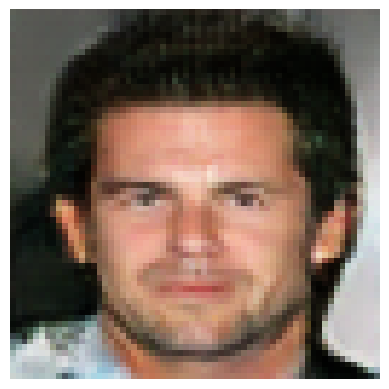

In [66]:
noise=tf.random.normal(shape=(1, 1, 1, z_dim))
fake_image=generator(noise)
plt.axis("off")
plt.imshow(tf.cast((fake_image[0]+1) * 127.5, tf.uint8));

### **Controllable Generation**

Load training models

In [9]:
tf.keras.backend.clear_session()

In [10]:
def accuracy(y_true, y_pred):
  y_pred=tf.math.sigmoid(y_pred)
  y_pred=tf.cast(y_pred>=0.5, dtype=tf.float32)
  accuracy=tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))
  return accuracy

In [13]:
classifier=tf.keras.models.load_model("/content/drive/MyDrive/models/classifier_celeba.keras",
                                      custom_objects={"accuracy":accuracy})
classifier.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 batch_normalization (Batch  (None, 16, 16, 128)       512       
 Normalization)                                                  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                        

In [14]:
generator=tf.keras.models.load_model("/content/drive/MyDrive/models/generator_celeba.keras")
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1, 64)]        0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 4, 4, 512)         524288    
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 4, 4, 512)         2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 4, 4, 512)         0         
                                                                 
 re_lu (ReLU)                (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 8, 8, 256)         20

In [15]:
label_names

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [17]:
def show_images(images, num_images, nrow):
  images=tf.cast((images+1) * 127.5, tf.uint8)
  images=make_grid(images, num_images, nrow)

  plt.figure(figsize=(nrow*2, nrow*2))
  plt.imshow(images)
  plt.axis("off")
  plt.show()

#Function for stochastic gradient ascent
def calculate_updated_noise(noise, grads, weight):
  new_noise = noise + grads * weight
  return new_noise

In [18]:
num_images=8
grad_steps=10
skip=2

**Generation**

In [19]:
def show_cont_generation(feature="Smiling", num_images=num_images, grad_steps=grad_steps, skip=skip, return_images=False):
  fake_images_history=[]
  target_index=label_names.index(feature)
  noise=tf.random.normal(shape=(num_images, 1, 1, z_dim))

  for i in range(grad_steps):
    with tf.GradientTape() as tape:
      tape.watch(noise)
      fake_image=generator(noise, training=False)
      fake_images_history.append(fake_image)
      fake_classes_score=tf.reduce_mean(classifier(fake_image, training=False)[:, target_index])

    grads=tape.gradient(fake_classes_score, noise)
    noise=calculate_updated_noise(noise, grads, 1/grad_steps)

  if return_images:
    return fake_images_history
  else:
    show_images(tf.concat(fake_images_history[::skip], axis=0),
                num_images=num_images*grad_steps//skip,
                nrow=grad_steps//skip)

Testing with some labels

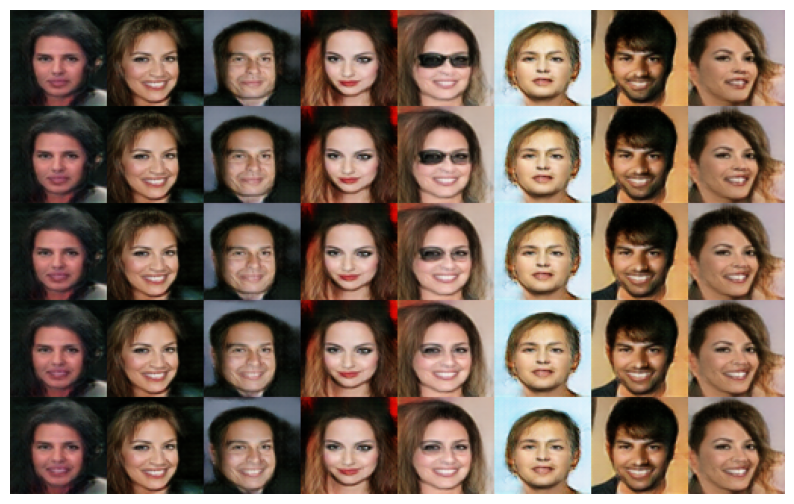

In [21]:
# Label: Smiling
show_cont_generation()

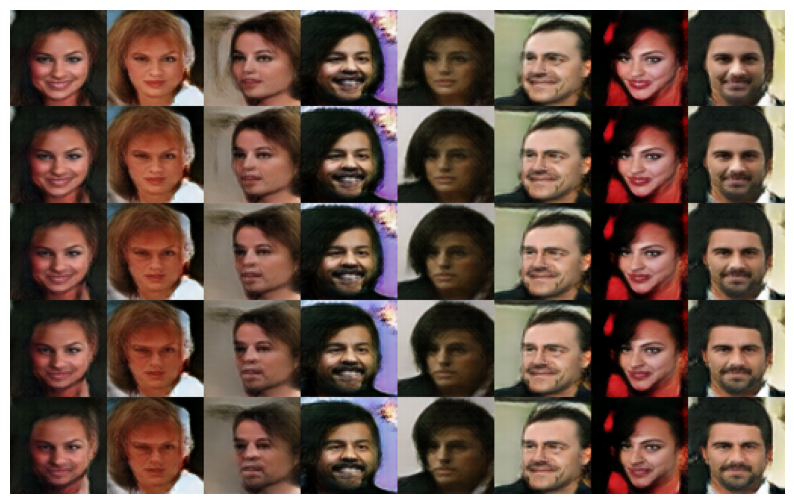

In [222]:
# Label: Male
show_cont_generation("Male")

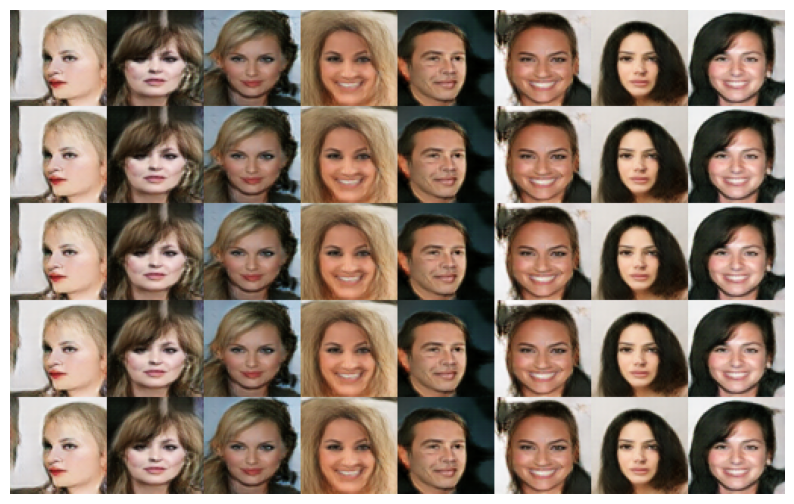

In [235]:
# Label: Attractive
show_cont_generation("Attractive")

**Create a gif from image labels**

In [46]:
directory_labels=os.path.join(directory_images, "labels_celeba")
os.makedirs(directory_labels, exist_ok=True)

In [139]:
def create_gif_label(feature="Smiling"):
  fake_images=show_cont_generation(feature=feature, num_images=1, return_images=True)
  file_label=os.path.join(directory_labels, f"{feature}")
  os.makedirs(file_label, exist_ok=True)
  gif_file=os.path.join(file_label, f"{feature}.gif")

  for i, image in enumerate(fake_images):
    image=tf.cast((image+1) * 127.5, tf.uint8)[0]
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(image)
    plt.title(feature, fontsize=8)
    plt.axis("off")
    plt.savefig(os.path.join(file_label, f"image{i:02d}.png"), transparent=True)
    plt.close()

  create_gif(gif_file, file_label, fps=1.5)
  return gif_file

Generating GIFs of some characteristics:


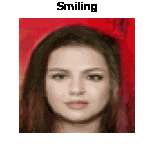

In [145]:
gif_file=create_gif_label()
embed.embed_file(gif_file)


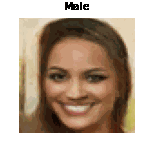

In [149]:
gif_file=create_gif_label("Male")
embed.embed_file(gif_file)


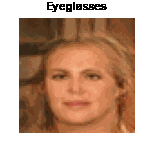

In [150]:
gif_file=create_gif_label("Eyeglasses")
embed.embed_file(gif_file)


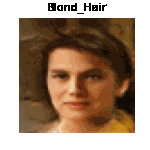

In [151]:
gif_file=create_gif_label("Blond_Hair")
embed.embed_file(gif_file)


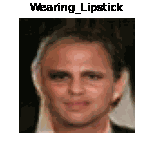

In [180]:
gif_file=create_gif_label("Wearing_Lipstick")
embed.embed_file(gif_file)


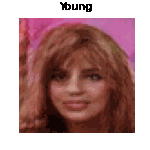

In [169]:
gif_file=create_gif_label("Young")
embed.embed_file(gif_file)


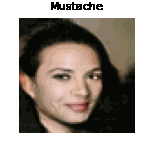

In [184]:
gif_file=create_gif_label("Mustache")
embed.embed_file(gif_file)


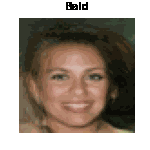

In [209]:
gif_file=create_gif_label("Bald")
embed.embed_file(gif_file)